In [2]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


##### 9/22/2014
* power meter recordings
    * nd32 = '100uW'
    * nd16 = '240uw'
    * nd08 = '0.530mW'
    * nd04 = '1.115mW'
    * nd02 = '2.26mW'
    *nd01 = '4.63mW'

##### 9/29/2014
* results from cross: 
    * U82 X J149 - +
    * U82 X J100 - +
    * U82 X J23 - ++
    * U82 X J18 - +
* imaging setup:
    * 2,000 frame zoom in and out to collect reference frame for imaging

##### 9/29/2014
Nice reference for thorax anatomy:
http://www.giand.it/diptera/morph/?id=5&lang=en

Imaging progress:
* Done: 
    * U82 X J121 n=6 [271,272,273,274,275,276]
    * U82 X J18 n=6 [265,266,267,268,269,270]
    * U82 X J100 n=6 [259,260,261,262,263,264]
    * U82 X J22 n=4 [255,256,257,258]
    * U82 X J23 n=6 [277,278,279,280,281,282]
* To Do:
    * J160
    * J146
    * J149
    * J22 (n=3)

##### 12/2/2014
nd on intensilight set to 4

Optical power measured @ 560nm using Cube#3 (chroma # 49008)
power = 3.5 mW

optical power measured @ 480nm using Cube#2 (chroma # 49011)
power = 2.2 mW


##### 1/6/2015
optical power measured @ 480nm using Cube#2 (chroma # 49011)

* Measurements made from LED using tri-pulse protocol: 147uW

* Power from led under constant illumination: 4.0 mW

##### 3/25/2015
39 fly_record.hdf5 files compressed and copied to GCE using a micro instance on the server side. The operation took 8.5 hrs.

##### 6/12/2015
Filter sets in Nikon FN1 located at Caltech.

All 'Semrock' brand
* 2: FITC - 3540B - NTE
* 3: TXRED - 4040B - NTE
* 4: LF488/LP - A - NTE
* 5: Custom 80/20 NIR C120714

##### 7/7/2015
Updated filter sets in Nikon FN1 located at Caltech.

* 1: Chroma 49008
* 2: Semrock FITC - 3540B - NTE
* 3: Semrock TXRED - 4040B - NTE
* 4: Semrock LF488/LP - A - NTE
* 5: Semrock Custom 80/20 NIR C120714
* 6: Chroma 49001

##### 7/27/2015

Procedure for segmenting muscle tissue:

* Import an 8bit tiff stack of a single channel into gimp: choose "Select All" and "Open pages as Layers" in the dialog box.

* convert to RGB (image>mode>RGB)

* Rename the background image as "Page 0"

* Save the imported stack as an .xcf (native gimp format) to use as a template.

* open a python console within gimp: filters>python-fu>Console

* get a reference to the image object:

```
>>> img = gimp.image_list()[0]
```


* add a blank layer in-between each existing layer

```
g = gimp.pdb
w = g.gimp_image_width(img)
h = g.gimp_image_height(img)
for lnum,layer in enumerate(reversed(img.layers)):
    g.gimp_image_set_active_layer(img,layer)
    new_layer = g.gimp_layer_new(img, w, h, RGBA_IMAGE, "lr%s"%(lnum), 1, NORMAL_MODE)
    img.add_layer(new_layer)
```

* hide all the layers:

```
for layer in img.layers:
    layer.visible = False
```

* starting from page 0 make the layers visible until you have reached the deepest slice of tissue you want to segment.

* Change the opacity of the transparent layers so you can see what you are segmenting

```
for layer in img.layers:
    if not('Page' in layer.name):
        layer.opacity = 0.2
```

* once you have completed the segmentation you can create a tiff stack with just the segmentation masks

* To delete the layers with the confocal data first make all layers visible: 

```
for layer in img.layers:
    layer.visible = True
```

* then hide layers not containing the string 'Page'

```
for layer in img.layers:
    if not('Page' in layer.name):
        layer.visible = False
```

* Merge the visible layers (Image>Merge Visible Layers)

* Delete the merged layer


##### 12/1/2015

Installed the pyfnnd library to test out Joshua Vogelstein's deconvolution method. First needed to install a shared lapack library using:

```
sudo apt-get install liblapack3.
```

Turns out that this method is not much more usefull than a high pass filter. It might work better for high-speed voltage imaging. Part of the problem is likely due to the fact that we have multiple spikes per frame

##### 12/1/2015
Calculation of solid angle obscured by objective (61°)

In [4]:
import numpy as np
2*np.pi*(1-np.cos(np.deg2rad(61)))

3.2370366244684861

##### 12/13/2015
some usefull git commands:

just push a particular branch:
```
git push -u origin gce_b0
```

Status including untracked files
```
git status -uall *.ipynb
```


##### 12/15/2015

Just had a conversation with John Tuthill regarding motoneurons. He noted that there is a motoneurons with lots of psd95 synapses on the cell body in VNC. Labeled by line R13D10. Comparing the Janelia images to Anne's work I don't think it is the B1 motor neuron.

* The R13D10 line
<img src = "http://flimg.janelia.org:8080/flylight-image/external-data/adult/secdata/projections/20080517/GMR_13D10_AE_01_07-fA01v_C080517_20080519235629578/GMR_13D10_AE_01_07-fA01v_C080517_20080519235629578_total.jpg"height = 600>

* This is in contrast to the b1 motor neuron line identifed by anne in (R95D06):
<table>
<tr>
<td>
<img src = "http://flimg.janelia.org:8080/flylight-image/external-data/adult/secdata/projections/20100909/GMR_95D06_AE_01_01-fA01v_C100909_20100909094153765/GMR_95D06_AE_01_01-fA01v_C100909_20100909094153765_total.jpg" height = 500>
</td>
<td>
<img src = "experimental_notes_data/MAX_95D06_01.jpg" height = 500>
</td>
</tr>

</table>

* Here is the image of a line that we found expresses in the TTM motor neuron (29E05):
<table>
<tr>
<td>
<img src = "http://flimg.janelia.org:8080/flylight-image/external-data/adult/secdata/projections/20081114/GMR_29E05_AE_01_03-fA01v_C081114_20081114103915718/GMR_29E05_AE_01_03-fA01v_C081114_20081114103915718_total.jpg" height = 500>
</td>
<td>
<img src = "experimental_notes_data/MAX_29E05_01.jpg" height = 500>
</td>
</tr>

##### 12/16/2015

Dichroics purchased for dual-channel setup

(<matplotlib.text.Text at 0x7f1745ecc890>, None)

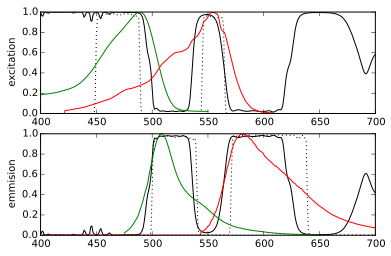

In [14]:
import os
import numpy as np
#! wget https://www.chroma.com/file/58217/download?token=JsQQ35wr -O experimental_notes_data/chroma_ET470_40x.txt
#! wget https://www.chroma.com/file/58237/download?token=SiVxhJ6A -O experimental_notes_data/chroma_59004bs.txt
#! wget https://www.chroma.com/file/57757/download?token=9UtZiWy5 -O experimental_notes_data/chroma_565dcxr.txt
#! wget https://www.chroma.com/file/58818/download?token=fe1lxm71 -O experimental_notes_data/chroma_ET520_40m.txt
#! wget https://www.chroma.com/file/58235/download?token=bWdWkeLW -O experimental_notes_data/chroma_ET605_70m.txt
#! wget https://www.chroma.com/file/59052/download?token=NBS_ZRAj -O experimental_notes_data/chroma_ET555_20x.txt
#! wget https://www.chroma.com/file/59612/download?token=bZbU0RHn -O experimental_notes_data/chroma_T495lpxr.txt
#! wget https://www.chroma.com/file/58523/download?token=mxeO2YCN -O experimental_notes_data/fluo_GFP_exc.txt
#! wget https://www.chroma.com/file/58521/download?token=gX3_oEIq -O experimental_notes_data/fluo_GFP_emi.txt
#! wget https://www.chroma.com/file/58900/download?token=55kn0E4W -O experimental_notes_data/fluo_tdTom_exc.txt
#! wget https://www.chroma.com/file/58898/download?token=gPAX0uao -O experimental_notes_data/fluo_tdTom_emi.txt
files = ['experimental_notes_data/'+s for s in os.listdir('experimental_notes_data/') if ('chroma' in s) | ('fluo' in s)]
keys = [s.split('.')[0] for s in os.listdir('experimental_notes_data/')  if ('chroma' in s) | ('fluo' in s)]
spectra_dict = dict()
for f,k in zip(files,keys):
    spectra_dict.update({k:np.loadtxt(f)})
subplot(2,1,1)
spectrum = spectra_dict['chroma_ET470_40x']
plot(spectrum[:,0],spectrum[:,1],color = 'k',ls = ':')
spectrum = spectra_dict['chroma_ET555_20x']
plot(spectrum[:,0],spectrum[:,1],color = 'k',ls = ':')
spectrum = spectra_dict['chroma_59004bs']
plot(spectrum[:,0],spectrum[:,1]*-1+1,color = 'k')
spectrum = spectra_dict['fluo_GFP_exc'];plot(spectrum[:,0],spectrum[:,1],color = 'g')
spectrum = spectra_dict['fluo_tdTom_exc'];plot(spectrum[:,0],spectrum[:,1],color = 'r')
gca().set_xbound(400,700),gca().set_ylabel('excitation')
subplot(2,1,2)
spectrum = spectra_dict['chroma_ET520_40m']
plot(spectrum[:,0],spectrum[:,1],color = 'k',ls = ':')
spectrum = spectra_dict['chroma_ET605_70m']
plot(spectrum[:,0],spectrum[:,1],color = 'k',ls = ':')
spectrum = spectra_dict['chroma_59004bs']
plot(spectrum[:,0],spectrum[:,1],color = 'k')
spectrum = spectra_dict['fluo_GFP_emi'];plot(spectrum[:,0],spectrum[:,1],color = 'g')
spectrum = spectra_dict['fluo_tdTom_emi'];plot(spectrum[:,0],spectrum[:,1],color = 'r')
gca().set_ylabel('emmision'),gca().set_xbound(400,700)
#savefig('spectra.pdf')

### Strains for spatial heat shock expression experiments

Ubiquitous expression of FRT flanked GAL80 on Chromosome 2 and 3, heat shock should permit expression in clones by removing GAL80 expression

* 38880 w[*]; P{w[+mC]=alphaTub84B(FRT.GAL80)}2/CyO; TM2/TM6B, Tb[1]
* 38881 w[*]; Bl[1]/CyO; P{w[+mC]=alphaTub84B(FRT.GAL80)}3

Ubiquitous expression of FRT stop GAL80, heat shock should suppress expression by removing FRT stop from clones

* 38878 w[*]; P{w[+mC]=tubP(FRT.stop)GAL80}2; MKRS/TM6B, Tb[1]
* 39213 w[*]; wg[Sp-1]/CyO; P{w[+mC]=tubP(FRT.stop)GAL80}3

Test heat shock concept by HS removal of FRT.stop from UAS-GFP

* 55810 w[1118]; P{y[+t7.7] w[+mC]=10XUAS(FRT.stop)GFP.Myr}su(Hw)attP5
* 55811 w[1118]; P{y[+t7.7] w[+mC]=10XUAS(FRT.stop)GFP.Myr}su(Hw)attP1

Heat shock flippase aspartic acid at residue 5, fly codon optimized chromosome I and II.

* 55818 w[1118] P{y[+t7.7] w[+mC]=hs-FLPD5.fco}attP3
* 56749 w[1118]; P{y[+t7.7] w[+mC]=hs-FLPD5.fco}attP40

Expresses Gal4 ubiquitiously - for testing.

* 5138 y[1] w[*]; P{w[+mC]=tubP-GAL4}LL7/TM3, Sb[1] Ser[1]
* 42738 y[1] w[*]; P{w[+mW.hs]=shi-GAL4.S}2/CyO

Ubiquitous expression of GAL4 under the control of the Act5C promoter following removal of a y[+] cassette by FLP recombinase.

* 3953 w[1118]; P{w[+mC]=AyGAL4}25/CyO

Think about testing the flp gradient in the nervous system using the technique discribed in: 

    Optimized tools for multicolor stochastic labeling reveal diverse stereotyped cell arrangements in the fly visual system
    Aljoscha Nern,Barret D. Pfeiffer, and Gerald M. Rubin1